# GLOBAL EPIDEMIOLOGICAL DATASET ON TUBERCULOSIS INCIDENCE WITH HEALTH AND SOCIO-ECONOMIC CORRELATES (2000–2022)

In [19]:
import pandas as pd

In [21]:
df=pd.read_csv(r"TB 5000.csv")

## How does TB incidence correlate with HIV co-infection rates across different age groups and genders?

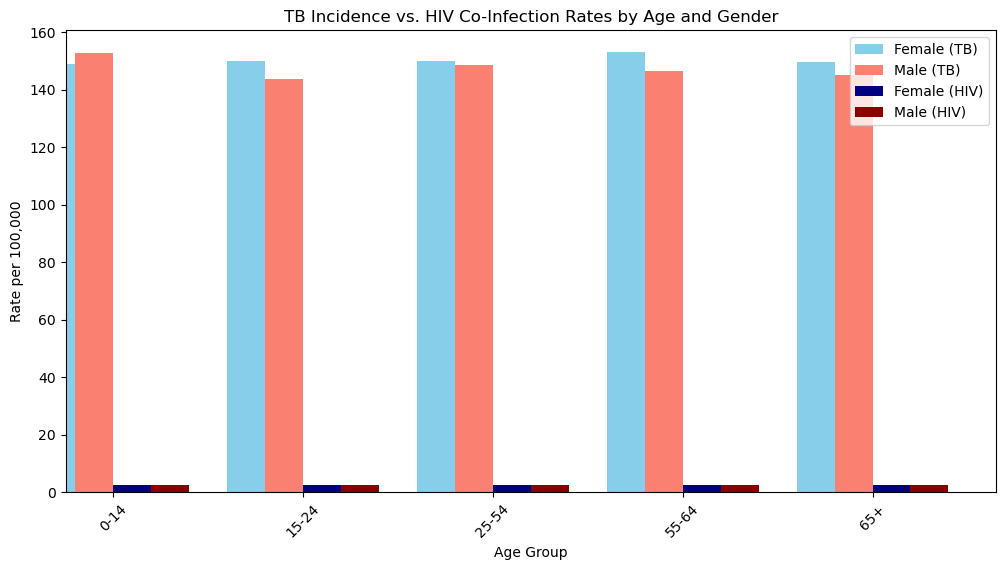

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data
age_gender_group = df.groupby(['Age_Group', 'Gender']).agg({
    'TB_Incidence_Rate': 'mean',
    'HIV_CoInfection_Rate': 'mean'
}).reset_index()

# Pivot for visualization
pivot_df = age_gender_group.pivot(index='Age_Group', columns='Gender', 
                                values=['TB_Incidence_Rate', 'HIV_CoInfection_Rate'])

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df['TB_Incidence_Rate'].plot(kind='bar', ax=ax, position=1, width=0.4, color=['skyblue', 'salmon'])
pivot_df['HIV_CoInfection_Rate'].plot(kind='bar', ax=ax, position=0, width=0.4, color=['navy', 'darkred'])
ax.set_title('TB Incidence vs. HIV Co-Infection Rates by Age and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Rate per 100,000')
ax.legend(['Female (TB)', 'Male (TB)', 'Female (HIV)', 'Male (HIV)'])
plt.xticks(rotation=45)
plt.savefig("TB incidence and mortality rate.png")
plt.show()


## What is the relationship between BCG vaccination coverage and multidrug-resistant TB rates in high-burden countries?

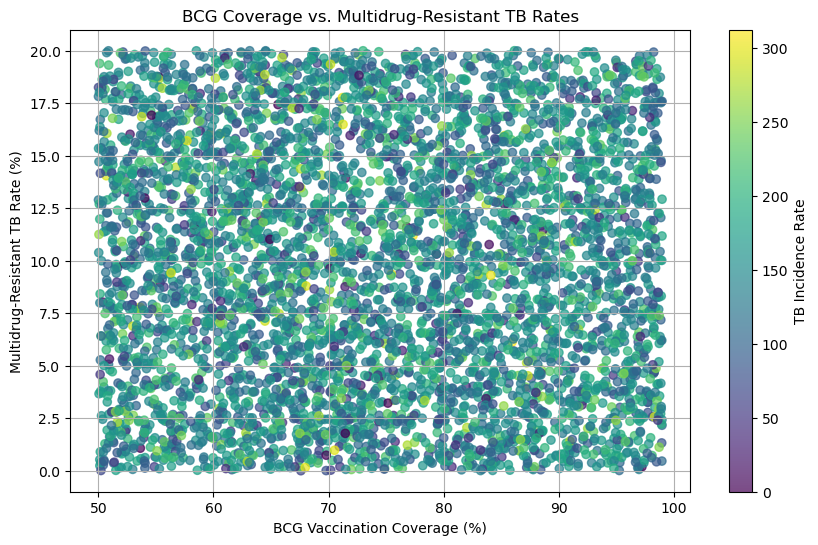

In [87]:
# Filter data for BCG coverage > 0
bcg_mdr = df[df['BCG_Vaccination_Coverage'] > 0]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(bcg_mdr['BCG_Vaccination_Coverage'], bcg_mdr['Multidrug_Resistance_Rate'], 
            c=bcg_mdr['TB_Incidence_Rate'], cmap='viridis', alpha=0.7)
plt.colorbar(label='TB Incidence Rate')
plt.title('BCG Coverage vs. Multidrug-Resistant TB Rates')
plt.xlabel('BCG Vaccination Coverage (%)')
plt.ylabel('Multidrug-Resistant TB Rate (%)')
plt.grid(True)
plt.savefig("BCG vaccination coverage.png")
plt.show()


## Do countries with higher primary healthcare access exhibit improved TB treatment success rates?

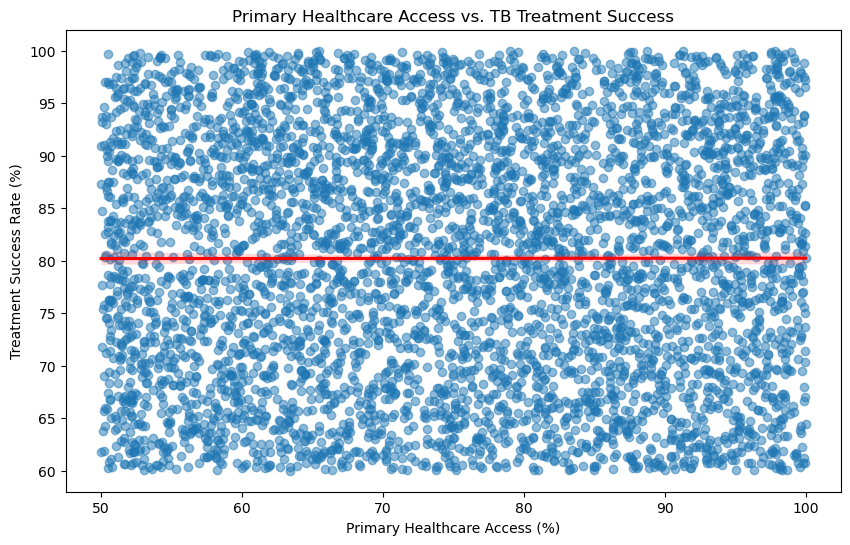

In [89]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=df['Primary_Healthcare_Access'], y=df['Treatment_Success_Rate'], 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Primary Healthcare Access vs. TB Treatment Success')
plt.xlabel('Primary Healthcare Access (%)')
plt.ylabel('Treatment Success Rate (%)')
plt.savefig("TB treatment success rate.png")
plt.show()


## How does TB mortality vary with urban versus rural population distribution?

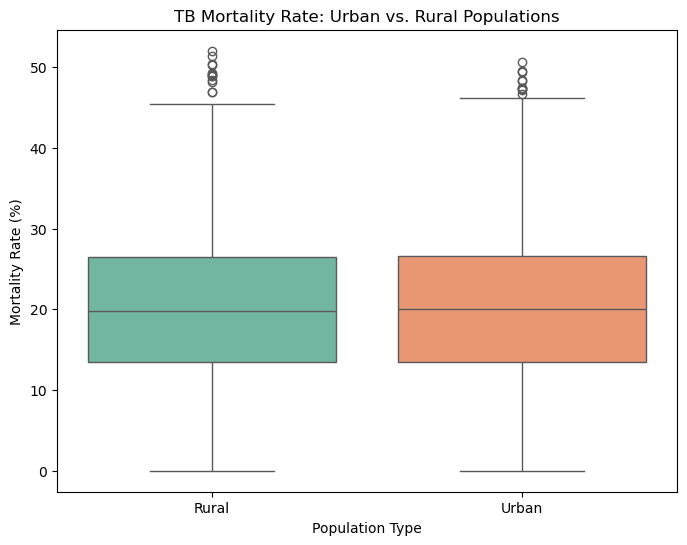

In [91]:
df['Urban_Rural'] = df['Urban_Population_Percentage'].apply(lambda x: 'Urban' if x >= 50 else 'Rural')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Urban_Rural', y='Mortality_Rate', hue='Urban_Rural',data=df, palette='Set2',legend=False)
plt.title('TB Mortality Rate: Urban vs. Rural Populations')
plt.xlabel('Population Type')
plt.ylabel('Mortality Rate (%)')
plt.savefig("TB mortality variation.png")
plt.show()


## Are smoking and alcohol consumption significant independent predictors of TB incidence after controlling for GDP and healthcare spending?

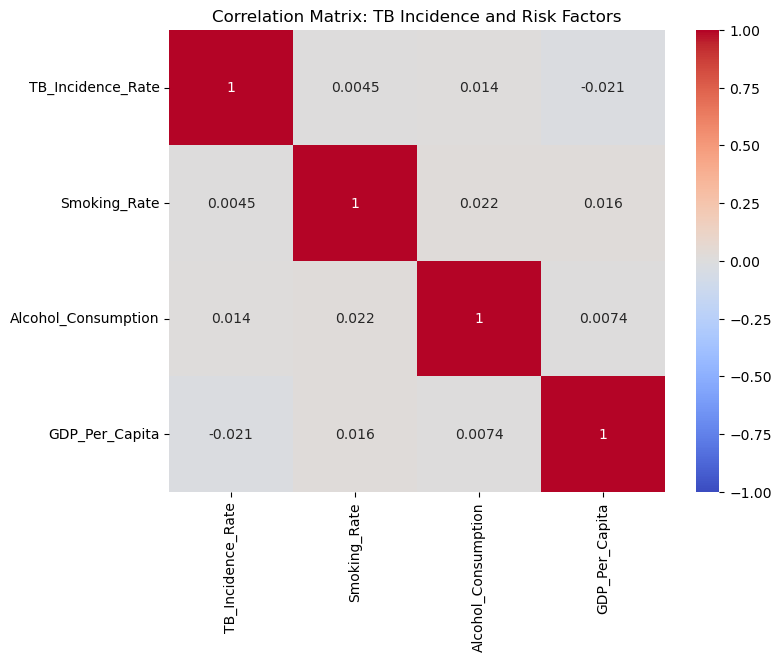

In [93]:
# Correlation matrix
corr_matrix = df[['TB_Incidence_Rate', 'Smoking_Rate', 'Alcohol_Consumption', 'GDP_Per_Capita']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: TB Incidence and Risk Factors')
plt.savefig("TB incidence after control for GDP and healthcare spending.png")
plt.show()


## Does GDP per capita moderate the effectiveness of TB screening programs in reducing incidence rates?

<Figure size 1000x600 with 0 Axes>

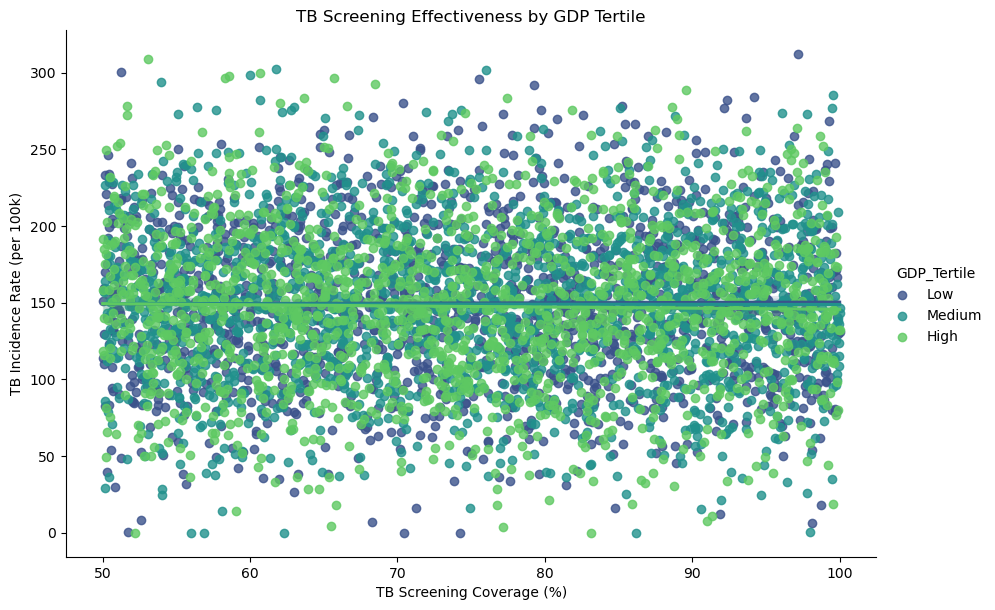

In [95]:
# Bin GDP into tertiles
df['GDP_Tertile'] = pd.qcut(df['GDP_Per_Capita'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.lmplot(x='TB_Screening_Coverage', y='TB_Incidence_Rate', hue='GDP_Tertile', 
           data=df, height=6, aspect=1.5, markers='o', palette='viridis')
plt.title('TB Screening Effectiveness by GDP Tertile')
plt.xlabel('TB Screening Coverage (%)')
plt.ylabel('TB Incidence Rate (per 100k)')
plt.savefig("GDP per capita.png")
plt.show()


## How do unemployment rates interact with TB incidence and healthcare expenditure in low-income versus high-income nations?

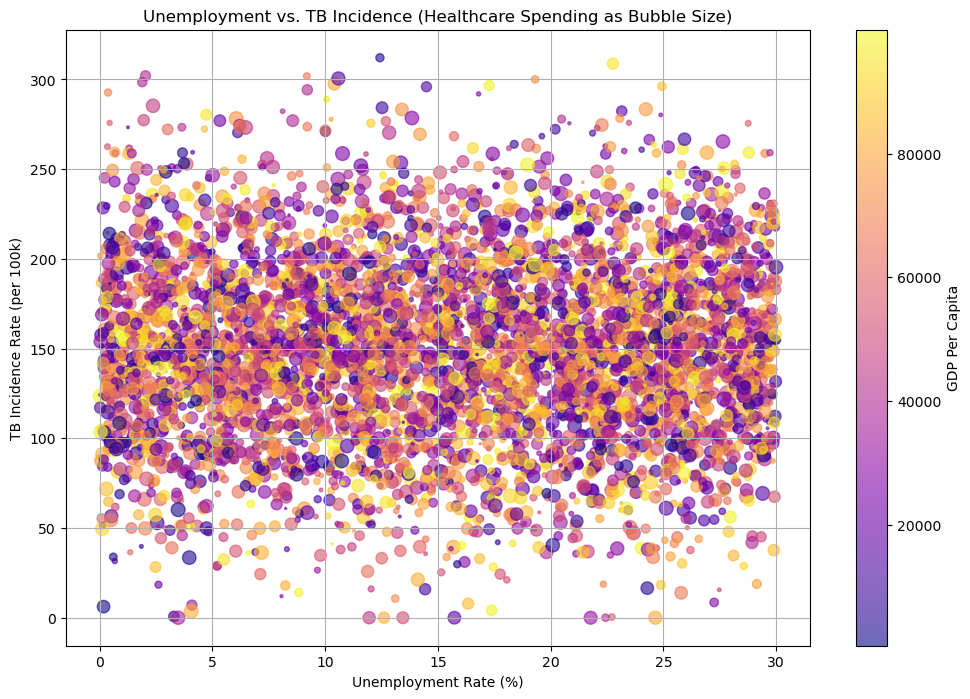

In [97]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Unemployment_Rate'], df['TB_Incidence_Rate'], 
            s=df['Healthcare_Expenditure_Per_Capita']/50, 
            c=df['GDP_Per_Capita'], alpha=0.6, cmap='plasma')
plt.colorbar(label='GDP Per Capita')
plt.title('Unemployment vs. TB Incidence (Healthcare Spending as Bubble Size)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('TB Incidence Rate (per 100k)')
plt.grid(True)
plt.savefig("TB unemployment rates.png")
plt.show()


## What is the long-term trend in TB incidence (2000–2022), and which countries demonstrate statistically significant deviations from global patterns?

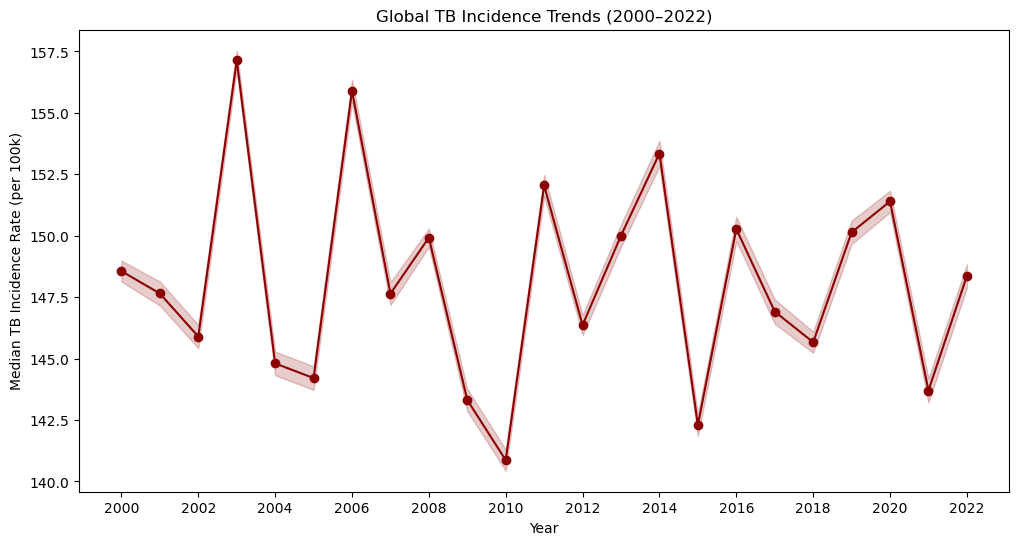

In [99]:
annual_trend = df.groupby('Year')['TB_Incidence_Rate'].agg(['median', 'std', 'count'])
annual_trend['ci'] = 1.96 * annual_trend['std'] / (annual_trend['count'])

plt.figure(figsize=(12, 6))
plt.plot(annual_trend.index, annual_trend['median'], marker='o', color='darkred')
plt.fill_between(annual_trend.index, 
                 annual_trend['median'] - annual_trend['ci'], 
                 annual_trend['median'] + annual_trend['ci'], 
                 alpha=0.2, color='darkred')
plt.title('Global TB Incidence Trends (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Median TB Incidence Rate (per 100k)')
plt.xticks(range(2000, 2023, 2))
plt.savefig("TB incidence and global deviations in countries.png")
plt.show()


## Does increased healthcare expenditure per capita correlate with reduced TB mortality, and does this relationship vary by region?

<Figure size 1200x700 with 0 Axes>

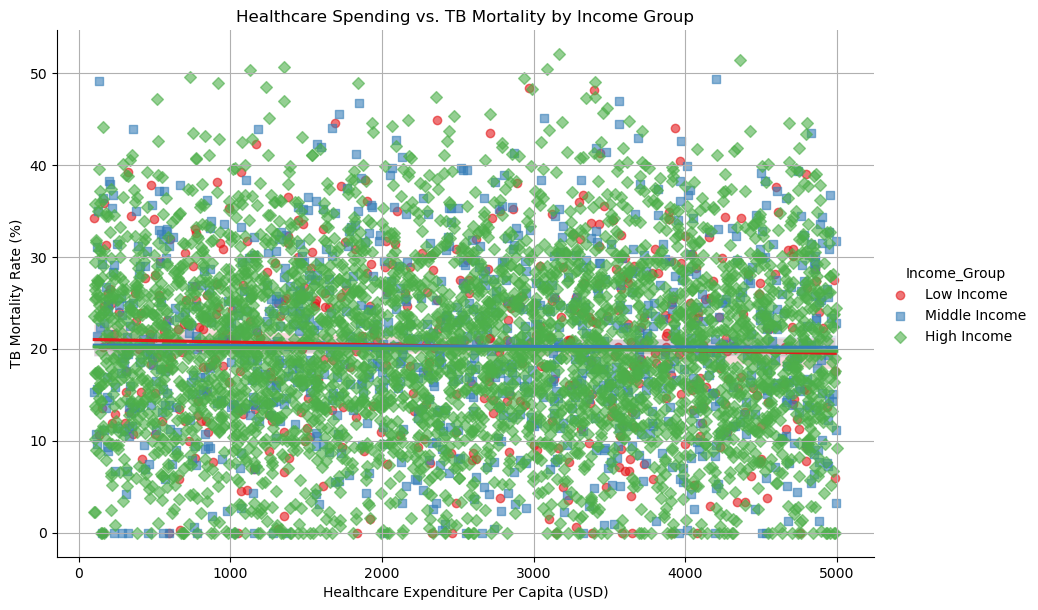

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bin GDP into income groups (customizable thresholds)
df['Income_Group'] = pd.cut(
    df['GDP_Per_Capita'], 
    bins=[0, 10000, 30000, float('inf')], 
    labels=['Low Income', 'Middle Income', 'High Income']
)

# Plot
plt.figure(figsize=(12, 7))
sns.lmplot(
    x='Healthcare_Expenditure_Per_Capita', 
    y='Mortality_Rate', 
    hue='Income_Group', 
    data=df, 
    height=6, 
    aspect=1.5, 
    markers=['o', 's', 'D'], 
    palette='Set1',
    scatter_kws={'alpha': 0.6}
)
plt.title('Healthcare Spending vs. TB Mortality by Income Group')
plt.xlabel('Healthcare Expenditure Per Capita (USD)')
plt.ylabel('TB Mortality Rate (%)')
plt.grid(True)
plt.savefig("Healthcare Spending vs. TB Mortality by Income Group.png")
plt.show()


## How do gender disparities in TB incidence relate to differences in healthcare access or socio-economic status?

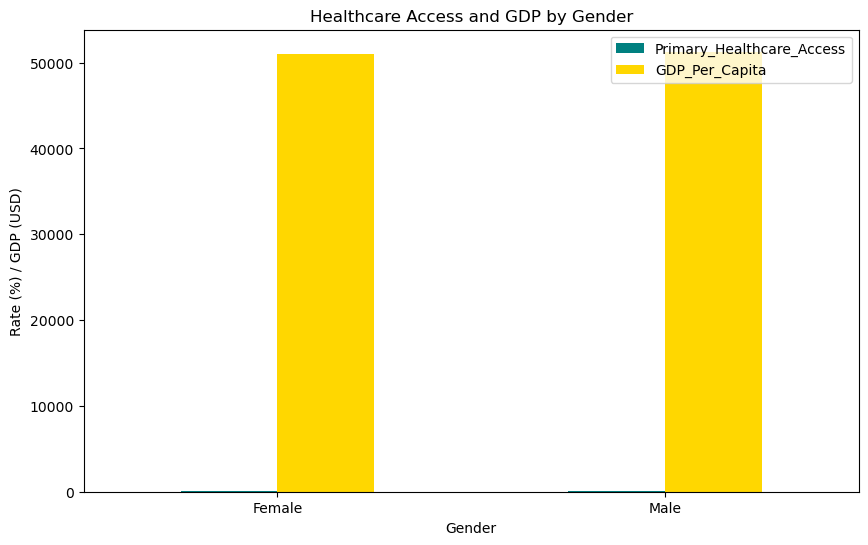

In [103]:
gender_stats = df.groupby('Gender').agg({
    'Primary_Healthcare_Access': 'mean',
    'GDP_Per_Capita': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
gender_stats.plot(x='Gender', y=['Primary_Healthcare_Access', 'GDP_Per_Capita'], 
                  kind='bar', ax=ax, color=['teal', 'gold'])
plt.title('Healthcare Access and GDP by Gender')
plt.xlabel('Gender')
plt.ylabel('Rate (%) / GDP (USD)')
plt.xticks(rotation=0)
plt.savefig("Healthcare Access and GDP by Gender.png")
plt.show()


## Are countries with higher BCG vaccination coverage less likely to experience pediatric TB cases (0–14 age group)?

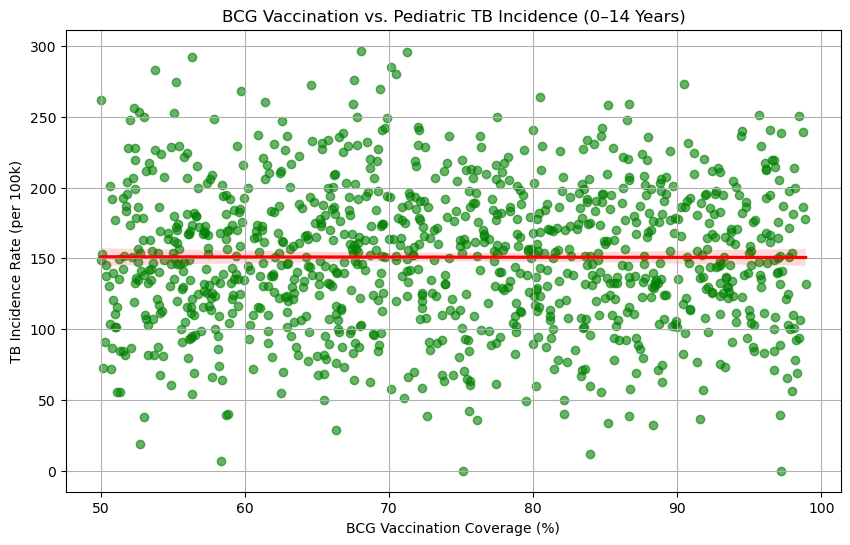

In [129]:
# Filter pediatric TB cases
pediatric_df = df[df['Age_Group'] == '0-14']

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x='BCG_Vaccination_Coverage', 
    y='TB_Incidence_Rate', 
    data=pediatric_df, 
    scatter_kws={'alpha': 0.6, 'color': 'green'}, 
    line_kws={'color': 'red'}
)
plt.title('BCG Vaccination vs. Pediatric TB Incidence (0–14 Years)')
plt.xlabel('BCG Vaccination Coverage (%)')
plt.ylabel('TB Incidence Rate (per 100k)')
plt.grid(True)
plt.savefig("BCG Vaccination vs. Pediatric TB Incidence (0–14 Years).png")
plt.show()


## What demographic factors (age, urbanization, life expectancy) are most predictive of TB treatment success rates?

                              OLS Regression Results                              
Dep. Variable:     Treatment_Success_Rate   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.199
Date:                    Tue, 04 Mar 2025   Prob (F-statistic):              0.304
Time:                            15:21:40   Log-Likelihood:                -19340.
No. Observations:                    5000   AIC:                         3.869e+04
Df Residuals:                        4993   BIC:                         3.874e+04
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

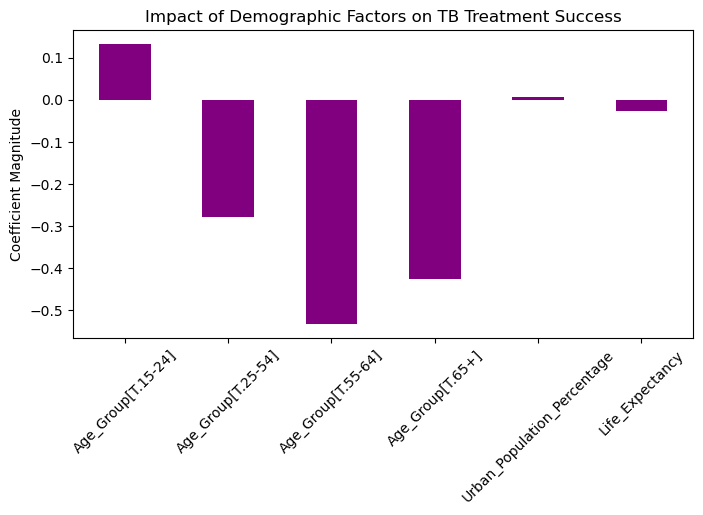

In [131]:
import statsmodels.formula.api as smf

# Regression model
model = smf.ols(
    'Treatment_Success_Rate ~ Age_Group + Urban_Population_Percentage + Life_Expectancy', 
    data=df
).fit()

# Summary and coefficients
print(model.summary())

# Plot coefficients
coeffs = model.params.drop('Intercept')
plt.figure(figsize=(8, 4))
coeffs.plot(kind='bar', color='purple')
plt.title('Impact of Demographic Factors on TB Treatment Success')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=45)
plt.savefig("Impact of Demographic Factors on TB Treatment Success.png")
plt.show()


## How does the prevalence of multidrug-resistant TB relate to historical trends in treatment success rates and antibiotic misuse?

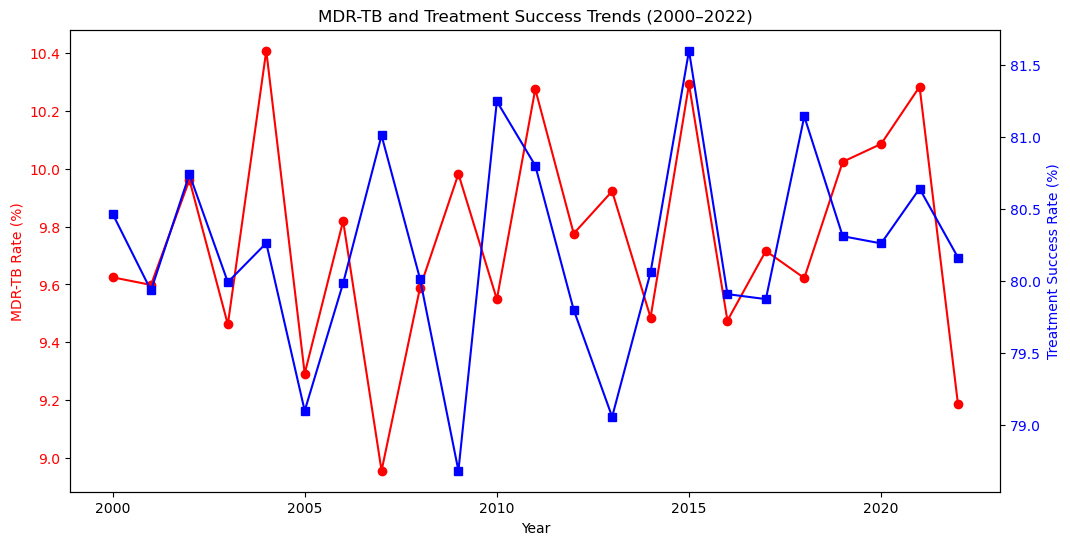

In [133]:
# Group by year
mdr_treatment = df.groupby('Year').agg({
    'Multidrug_Resistance_Rate': 'mean',
    'Treatment_Success_Rate': 'mean'
})

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(mdr_treatment.index, mdr_treatment['Multidrug_Resistance_Rate'], color='red', marker='o', label='MDR-TB Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('MDR-TB Rate (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(mdr_treatment.index, mdr_treatment['Treatment_Success_Rate'], color='blue', marker='s', label='Treatment Success')
ax2.set_ylabel('Treatment Success Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('MDR-TB and Treatment Success Trends (2000–2022)')
plt.savefig("")
plt.savefig("multidrug resistance rate.png")
plt.show()

## Do countries with higher TB screening coverage achieve faster reductions in incidence compared to those relying on passive case detection?

<Figure size 1200x600 with 0 Axes>

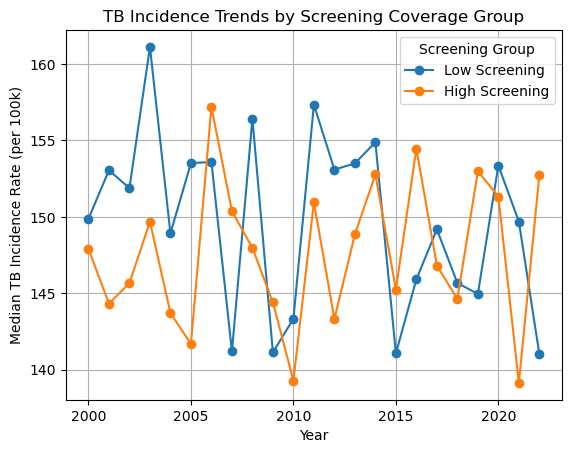

In [135]:
# Categorize screening coverage
df['Screening_Group'] = pd.cut(
    df['TB_Screening_Coverage'], 
    bins=[0, 70, 100], 
    labels=['Low Screening', 'High Screening']
)

# Group by year and screening group
screening_trend = df.groupby(['Year', 'Screening_Group'],observed=False
                            )['TB_Incidence_Rate'].median().unstack()

# Plot
plt.figure(figsize=(12, 6))
screening_trend.plot(marker='o')
plt.title('TB Incidence Trends by Screening Coverage Group')
plt.xlabel('Year')
plt.ylabel('Median TB Incidence Rate (per 100k)')
plt.legend(title='Screening Group')
plt.grid(True)
plt.savefig("TB Incidence Trends by Screening Coverage Group.png")
plt.show()


## What is the combined impact of HIV prevalence and healthcare expenditure on TB mortality across sub-Saharan Africa versus other regions?

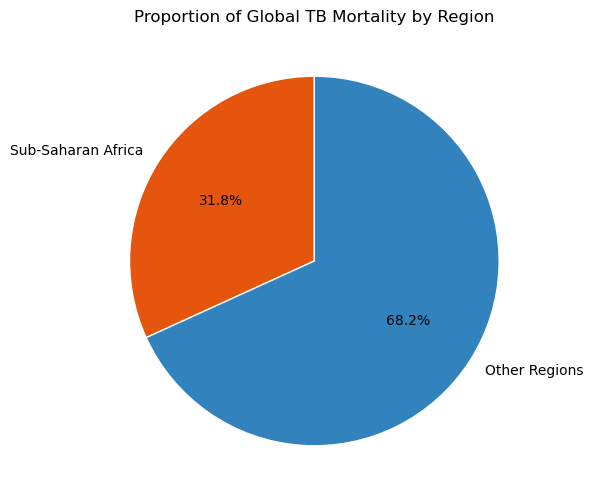

In [137]:

# Pie chart for TB mortality contribution
total_mortality_ssa = df[ssa_mask]['Mortality_Rate'].sum()
total_mortality_other = df[~ssa_mask]['Mortality_Rate'].sum()

plt.figure(figsize=(8, 6))
plt.pie([total_mortality_ssa, total_mortality_other], 
        labels=['Sub-Saharan Africa', 'Other Regions'], 
        autopct='%1.1f%%', colors=['#e6550d', '#3182bd'],
        startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Global TB Mortality by Region')
plt.savefig("Proportion of Global TB Mortality by Region.png")
plt.show()